In [1]:
from sklearn.utils import resample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
wine_data = load_wine()
print(wine_data.keys())
#data.target[[10, 80, 140]]
#array([0, 1, 2])
#>>> list(data.target_names)
#['class_0', 'class_1', 'class_2']

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [6]:
gnb = GaussianNB()

In [7]:
print(wine_data['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [8]:
X = wine_data['data']

In [9]:
y = wine_data['target']

In [10]:
X.shape

(178, 13)

In [11]:
from collections import Counter

In [12]:
Counter(y)

Counter({0: 59, 1: 71, 2: 48})

In [13]:
train_idx = np.random.randint(0, X.shape[0], size=(X.shape[0],100))

In [14]:
oob_idx = [list(set(range(X.shape[0])) - set(train_idx[i,:])) for i in range(X.shape[0])]

In [15]:
import importlib
importlib.reload(pd)

<module 'pandas' from '/Users/leahelmers/idalab/projects/bootstrapping/.venv/lib/python3.6/site-packages/pandas/__init__.py'>

In [110]:
preds=[]
trues=[]
precs=[]
recs=[]
aucs=[]
threshs=[]
label=0
for train_inds, test_inds in zip(train_idx, oob_idx):
    gnb.fit(X[train_inds,:], (y[train_inds] == label).astype(int))
    pred = gnb.predict_proba(X[test_inds,:])[:,1]
    true = (y[test_inds] == label).astype(int)
    preds.append(pred)
    trues.append(true)
    recs_temp=[]
    precs_temp=[]
    for thresh in np.linspace(0,1,100):
        precs_temp.append(precision_score(true, (pred>=thresh).astype(int)))
        recs_temp.append(recall_score(true, (pred>=thresh).astype(int)))
    precs.append(precs_temp)
    recs.append(recs_temp)
    threshs.append(preds)

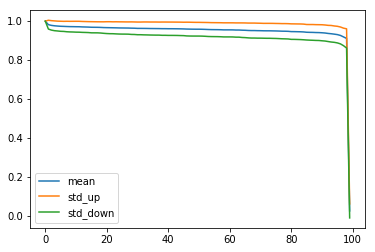

In [60]:
pd.DataFrame({'mean': mean_recs, 'std_up': mean_std_up, 'std_down':mean_std_down}).plot()

In [123]:
stats_prec = pd.DataFrame(precs).T

In [124]:
stats_prec['conf_int_up'] = stats_prec.apply(lambda x: np.nanquantile(x, .975), axis=1)
stats_prec['conf_int_down'] = stats_prec.apply(lambda x: np.nanquantile(x, .25), axis=1)
stats_prec['mean'] = stats_prec[np.arange(0,178)].mean(1)

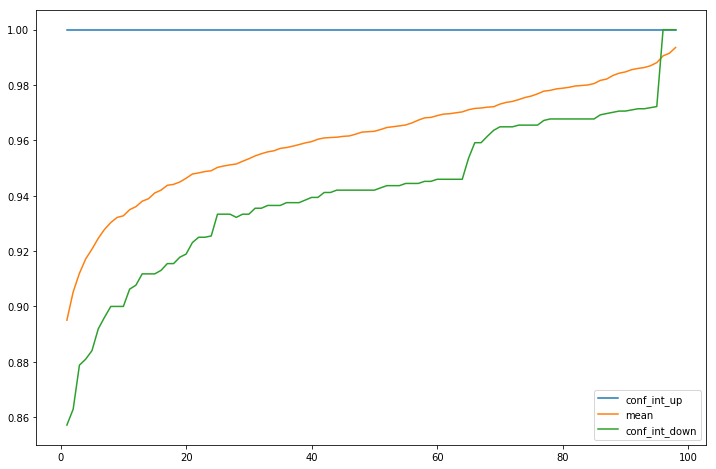

In [129]:
stats_prec[['conf_int_up', 'mean', 'conf_int_down']].loc[1:98].plot(figsize=(12,8))

In [113]:
stats_rec = pd.DataFrame(recs).T

In [115]:
stats_rec['conf_int_up'] = stats_rec.apply(lambda x: np.nanquantile(x, .975), axis=1)
stats_rec['conf_int_down'] = stats_rec.apply(lambda x: np.nanquantile(x, .25), axis=1)
stats_rec['mean'] = stats_rec[np.arange(0,178)].mean(1)

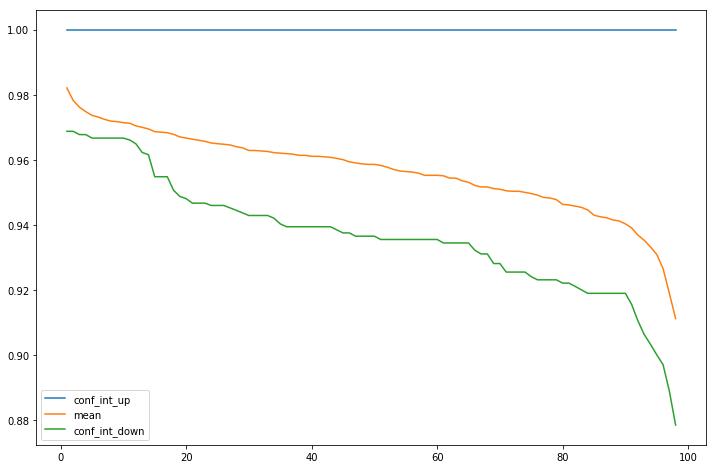

In [130]:
stats_rec[['conf_int_up', 'mean', 'conf_int_down']].loc[1:98].plot(figsize=(12,8))

In [ ]:
stats_rec['conf_int_upper'] = stats_rec[0].map(lambda x)

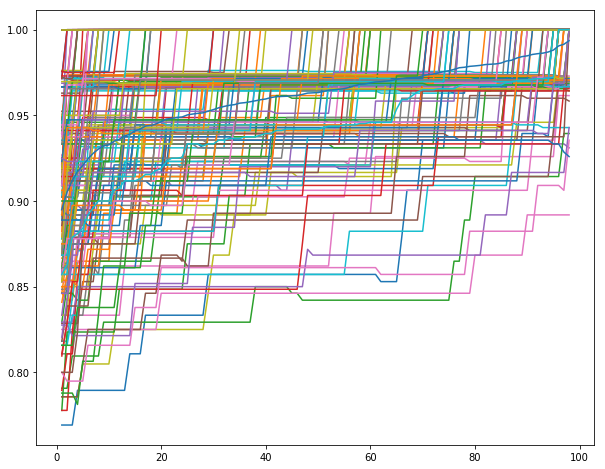

In [136]:
stats_prec.loc[1:98].plot(legend=False, figsize=(10,8))


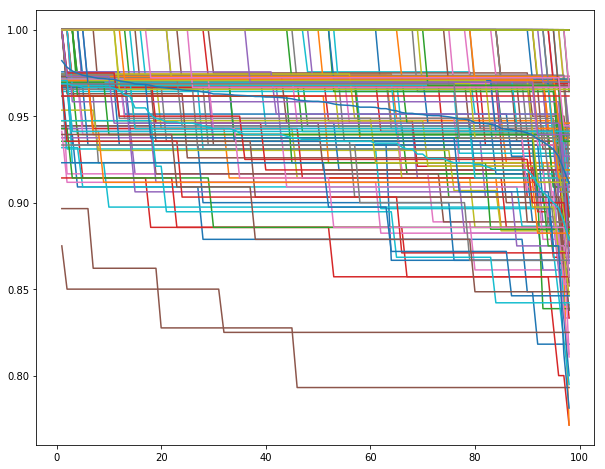

In [137]:
stats_rec.loc[1:98].plot(legend=False, figsize=(10,8))

In [ ]:
boot = resample(data, replace=True, n_samples=4, random_state=1)

### Toy dataset

In [155]:
true_labels =  np.random.choice(np.concatenate([np.repeat(0,500),np.repeat(1,500)]), 1000, replace=False)

In [167]:
preds=[]
for i in np.arange(0,100):
    preds.append(np.random.randint(0,101,size=1000)/100)

In [168]:
precs=[]
recs=[]
for pred in preds:
    recs_temp=[]
    precs_temp=[]
    for thresh in np.linspace(0,1,100):
        precs_temp.append(precision_score(true_labels, (pred>=thresh).astype(int)))
        recs_temp.append(recall_score(true_labels, (pred>=thresh).astype(int)))
    precs.append(precs_temp)
    recs.append(recs_temp)

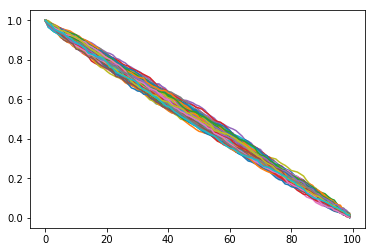

In [171]:
pd.DataFrame(recs).T.plot(legend=False)

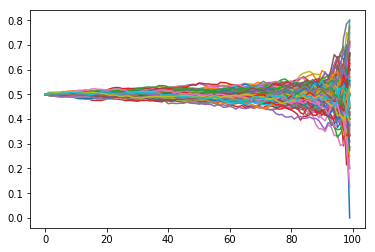

In [172]:
pd.DataFrame(precs).T.plot(legend=False)